https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_EMB

In [3]:
X = data_EMB.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=91.289412, expected=89.276009
predicted=89.557580, expected=89.097290
predicted=89.084448, expected=89.715935
predicted=89.728052, expected=89.488045
predicted=89.653675, expected=89.520592
predicted=89.609188, expected=89.792030
predicted=89.866706, expected=89.628632
predicted=89.766851, expected=89.056580
predicted=89.210366, expected=89.612274
predicted=89.615288, expected=88.639816
predicted=88.878346, expected=89.045410
predicted=89.038095, expected=87.847748
predicted=88.098523, expected=88.553230
predicted=88.486060, expected=88.298935
predicted=88.465904, expected=88.825729
predicted=88.848234, expected=89.888451
predicted=89.904593, expected=87.985397
predicted=88.386983, expected=88.010124
predicted=87.982026, expected=89.815613
predicted=89.687224, expected=90.643105
predicted=90.749293, expected=90.403137
predicted=90.588409, expected=89.782516
predicted=89.947484, expected=89.525970
predicted=89.622692, expected=89.632973
predicted=89.704606, expected=90.555214


predicted=107.954195, expected=107.844223
predicted=107.982977, expected=107.739731
predicted=107.854740, expected=107.788948
predicted=107.880591, expected=107.808640
predicted=107.908349, expected=108.044853
predicted=108.124093, expected=108.053627
predicted=108.164147, expected=107.687950
predicted=107.824278, expected=108.201881
predicted=108.236913, expected=108.607094
Test MSE: 0.784


In [9]:
error_EMB = math.sqrt(mean_squared_error(test, predictions))
%store error_EMB
print('Test RMSE: %.3f' % error_EMB)

Stored 'error_EMB' (float)
Test RMSE: 0.886


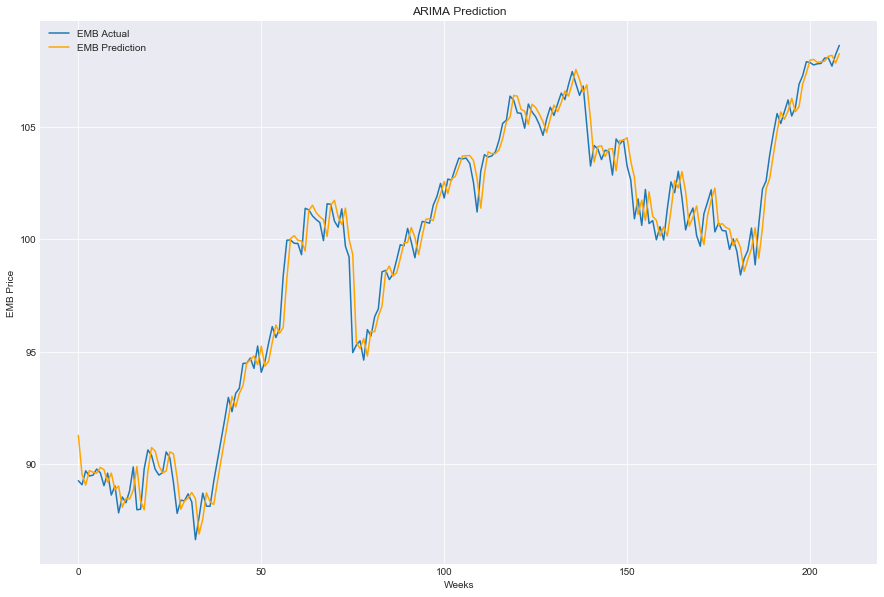

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'EMB Actual')
plt.plot(predictions, color='orange', label = 'EMB Prediction')
plt.xlabel('Weeks')
plt.ylabel('EMB Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_EMB = pd.DataFrame(predictions) 
ARIMA_pred_EMB.columns = ['ARIMA_pred_EMB']
%store ARIMA_pred_EMB

Stored 'ARIMA_pred_EMB' (DataFrame)
